## Important Info: Here we test the model cancelable property
- Used DAC (RP projected) data to train an NN model
- Training data is project by a set of key
- Follow same RP approach that mentioned before
- Follow the same NN architecture
- For 10 rounds of training training accurach reached to 100.0% and validation accuracy reached to 100.0%
- We then used used another set of training data (project by different Random matrix) to update the model (trainfer learning!)  
- Within few round of traing the moedl training accurach reached to 100.0% and validation accuracy reached to 100.0%.
- Model test accuracy for new test data is 100.0% though it was 0.20% for the initial model.

In [1]:
#Read all data [0-192:193 users' oversampled data]
import csv
import pandas as pd
dataset=pd.read_csv('Dataset/OversampledDACData.csv',index_col=0)
dataset.head()

,1,2,3,4,5,6,7,8,9,10,...,57,58,59,60,61,62,63,64,65,Label
0,0.178862,0.316667,0.251082,0.144628,0.366255,0.323770,0.065844,0.020243,0.032129,0.060729,...,0.732435,0.736285,0.734870,0.707042,0.131098,0.196,1.0,0.279070,0.016393,0
1,0.166667,0.108333,0.069264,0.074380,0.246914,0.327869,0.213992,0.198381,0.116466,0.085020,...,0.670837,0.671800,0.670509,0.651643,0.170732,0.156,0.0,0.209302,0.234973,0
2,0.162602,0.112500,0.510823,0.280992,0.213992,0.040984,0.086420,0.052632,0.184739,0.259109,...,0.651588,0.651588,0.657061,0.642254,0.320122,0.124,0.0,0.186047,0.327869,0
3,0.085366,0.045833,0.025974,0.045455,0.181070,0.090164,0.045267,0.194332,0.188755,0.323887,...,0.641963,0.641963,0.645533,0.635681,0.204268,0.080,1.0,0.325581,0.054645,0
4,0.512195,0.295833,0.220779,0.247934,0.378601,0.069672,0.600823,0.785425,0.465863,0.477733,...,0.727623,0.732435,0.731028,0.694836,0.173780,0.504,0.0,0.255814,0.245902,0


In [2]:
#replace the user Level by class name and count the number of sample in each class
#dataset['Label'] = pd.factorize(dataset['Label'])[0]
dataset.groupby(['Label'])['Label'].count()

Label
0      300
1      300
2      300
3      300
4      300
      ... 
188    300
189    300
190    300
191    300
192    300
Name: Label, Length: 193, dtype: int64

In [3]:
#seperate the profile in two groups (80.0%, 20.0%): (i) Training profile (0-155), and (ii) auxiliary profile (156-192)
totalUser= len(pd.unique(dataset['Label']))
trainingData = dataset[dataset['Label'] <155]
auxilaryData = dataset[dataset['Label'] >= 155]
print("Total user in training dataset:", len(pd.unique(trainingData['Label'])))
print("Total user in auxiliary dataset:", len(pd.unique(auxilaryData['Label'])))
#assigned 0-154 users' data to dataset
dataset=trainingData

Total user in training dataset: 155
Total user in auxiliary dataset: 38


In [4]:
#total use in the system
totalUser= len(pd.unique(dataset['Label']))
trainingData=dataset
print("Total user in the training dataset:", len(pd.unique(trainingData['Label'])))

Total user in the training dataset: 155


In [5]:
#Seperate the data for model training and model update
import tensorflow
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

Modeldataset, Updatedataset= train_test_split(trainingData,test_size=0.3, random_state=22)
#ytrain = to_categorical(Modeldataset)
#ytest = to_categorical()
print(Modeldataset.shape)
print(Updatedataset.shape)

(32578, 66)
(13962, 66)


In [6]:
#Random project the model dataset
import numpy as np
from sklearn.random_projection import SparseRandomProjection

column1=['RPF1','RPF2','RPF3','RPF4','RPF5','RPF6','RPF7','RPF8','RPF9','RPF10','RPF11','RPF12','RPF13','RPF14','RPF15',
         'RPF16','RPF17','RPF18','RPF19','RPF20','RPF21','RPF22','RPF23','RPF24','RPF25','RPF26','RPF27','RPF28','RPF29','RPF30',
         'RPF31','RPF32','RPF33','RPF34','RPF35','RPF36','RPF37','RPF38','RPF39','RPF40','RPF41','RPF42','RPF43','RPF44','RPF45',
         'RPF46','RPF47','RPF48','RPF49','RPF50','RPF51','RPF52','RPF53','RPF54','RPF55','RPF56','Label']
column2=column1=['RPF1','RPF2','RPF3','RPF4','RPF5','RPF6','RPF7','RPF8','RPF9','RPF10','RPF11','RPF12','RPF13','RPF14','RPF15',
         'RPF16','RPF17','RPF18','RPF19','RPF20','RPF21','RPF22','RPF23','RPF24','RPF25','RPF26','RPF27','RPF28','RPF29','RPF30',
         'RPF31','RPF32','RPF33','RPF34','RPF35','RPF36','RPF37','RPF38','RPF39','RPF40','RPF41','RPF42','RPF43','RPF44','RPF45',
         'RPF46','RPF47','RPF48','RPF49','RPF50','RPF51','RPF52','RPF53','RPF54','RPF55','RPF56']
ModeldatasetRP = pd.DataFrame(columns=column1)

for seed in range(0, 155):
    rng = np.random.RandomState(seed)
    X = Modeldataset[Modeldataset['Label'] == seed]

    if len(X) > 0:
        transformer = SparseRandomProjection(n_components=56, random_state=rng)
        Xdata = X.drop(columns=['Label'])
        XRP = pd.DataFrame(transformer.fit_transform(Xdata), columns=column2)
        XRP['Label'] = seed
        ModeldatasetRP = pd.concat([ModeldatasetRP, XRP], ignore_index=True)


print(Modeldataset.shape)
print(ModeldatasetRP.shape)

C:\Users\mdmor\AppData\Local\Temp\ipykernel_14988\1142545386.py:24: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  ModeldatasetRP = pd.concat([ModeldatasetRP, XRP], ignore_index=True)


(32578, 66)
(32578, 57)


In [7]:
#Prepare the traning data for training and testing the model
import tensorflow
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

X=ModeldatasetRP.drop(columns=['Label'])
y=ModeldatasetRP['Label']

Xtrain, Xval, ytrain, yval = train_test_split(X, y, test_size=0.1, random_state=22)
#Xtrain, Xval, ytrain, yval = train_test_split(Xtrain, ytrain, test_size=0.1, random_state=22)

ytrain = to_categorical(ytrain)
yval = to_categorical(yval)
#ytest = to_categorical(ytest)

In [8]:
print(Xtrain.shape)
print(ytrain.shape)
print(Xval.shape)
print(yval.shape)
#print(Xtest.shape)
#print(ytest.shape)

(29320, 56)
(29320, 155)
(3258, 56)
(3258, 155)


In [9]:
# import all necessary package for a neural network
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#matplotlib inlineimport keras
from keras.layers import Dense, Dropout, Input,Activation,Dropout, Flatten
from keras.models import Model,Sequential
from keras.datasets import mnist
#from tqdm import tqdm
#from keras.layers.advanced_activations import LeakyReLU
from keras.layers import BatchNormalization
from keras.optimizers import Adam
#import torch.nn.functional as F

In [10]:
#define optimizers for neural network
from keras.optimizers import SGD, RMSprop, Adam
def adam_optimizer():
    return Adam(learning_rate=0.0002, beta_1=0.5)

def RMSprop_optimizer():
    return RMSprop(learning_rate=0.001, rho=0.9)

In [11]:
#neural network architecture for model training

def create_classifierRP(release=False,totalClass=155):
  classifier = Sequential()
  classifier.add(Dense(64, input_dim=56))
  classifier.add(BatchNormalization())
  classifier.add(Activation('relu'))
  classifier.add(Dropout(0.5))
  
  #classifier.add(Dense(256))
  #classifier.add(BatchNormalization())
  #classifier.add(Activation('relu'))

  classifier.add(Dense(128))
  classifier.add(BatchNormalization())
  classifier.add(Activation('relu'))
  classifier.add(Dropout(0.2))

  #classifier.add(Dense(256))
  #classifier.add(BatchNormalization())
  #classifier.add(Activation('relu'))

  #classifier.add(Dense(256))
  #classifier.add(BatchNormalization())
  #classifier.add(Activation('relu'))

  classifier.add(Dense(64))
  classifier.add(BatchNormalization())
  classifier.add(Activation('relu'))
  classifier.add(Dropout(0.2))

  #if release:
  classifier.add(Dense(totalClass, activation='softmax'))
  #else:
  #   classifier.add(Dense(Tuser))
  #np.log_softmax_v2(a, axis=axis)
  #classifier.add(F.softmax(a, dim=1))

  classifier.compile(loss='categorical_crossentropy', optimizer=RMSprop_optimizer(),metrics=['accuracy'])
  return classifier

Clasf=create_classifierRP()
Clasf.summary()

C:\Users\mdmor\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         3,648 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 155)            │        10,075 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,323 (122.36 KB)

 Trainable params: 30,811 (120.36 KB)

 Non-trainable params: 512 (2.00 KB)

In [12]:
#Train the classifier seperately for black-box attack
import keras

from keras.datasets import mnist
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, UpSampling2D
from keras.optimizers import SGD, RMSprop, Adam
from keras.callbacks import ReduceLROnPlateau


learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', patience=5, verbose=1, factor=0.5,min_lr=0.0001)
callbacks_list = [learning_rate_reduction]

Classfier2= create_classifierRP(True,155)

#------Comment will start from here
lossc='categorical_crossentropy'
optimizerc=RMSprop(learning_rate=0.001, rho=0.9)
Classfier2.compile(loss=lossc, optimizer=optimizerc,metrics=['accuracy'])
#------Comments will end from here
historyc2 =  Classfier2.fit(Xtrain, ytrain, batch_size=64, epochs=20, validation_data=(Xval, yval),verbose=1)

Epoch 1/20
459/459 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.1974 - loss: 4.1488 - val_accuracy: 0.9883 - val_loss: 0.9755
Epoch 2/20
459/459 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7146 - loss: 1.4149 - val_accuracy: 1.0000 - val_loss: 0.0617
Epoch 3/20
459/459 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8050 - loss: 0.7621 - val_accuracy: 1.0000 - val_loss: 0.0116
Epoch 4/20
459/459 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8349 - loss: 0.6009 - val_accuracy: 1.0000 - val_loss: 0.0050
Epoch 5/20
459/459 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8514 - loss: 0.5140 - val_accuracy: 1.0000 - val_loss: 0.0026
Epoch 6/20
459/459 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8633 - loss: 0.4774 - val_accuracy: 1.0000 - val_loss: 0.0016
Epoch 7/20
459/459 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8743 - loss: 0.4306 - val_accuracy: 1.0000 - val_loss: 0.0014
Epoch 8/20
459/459 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8782 - loss: 0.4167 - val_accuracy: 1.

Text(0.5, 0, 'epochs')

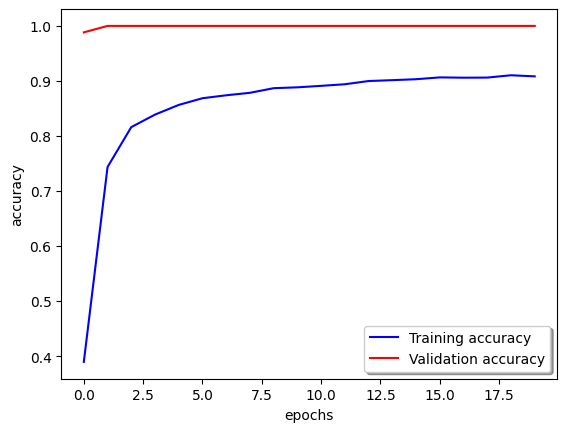

In [13]:
# Plot the classifier loss and accuracy curves for training and validation data
import matplotlib.pyplot as plt
plt.plot(historyc2.history['accuracy'], color='b', label="Training accuracy")
plt.plot(historyc2.history['val_accuracy'], color='r',label="Validation accuracy")
legend = plt.legend(loc='best', shadow=True)
plt.ylabel('accuracy')
plt.xlabel('epochs')

In [14]:
#read the test data and seperate test data
import csv
import pandas as pd
testdataset=pd.read_csv('Dataset/DACDatatest.csv',index_col=0)
testdataset = testdataset[testdataset['Label'] < 155]
#testdataset.head()

In [15]:
import numpy as np
from sklearn.random_projection import SparseRandomProjection

column1=['RPF1','RPF2','RPF3','RPF4','RPF5','RPF6','RPF7','RPF8','RPF9','RPF10','RPF11','RPF12','RPF13','RPF14','RPF15',
         'RPF16','RPF17','RPF18','RPF19','RPF20','RPF21','RPF22','RPF23','RPF24','RPF25','RPF26','RPF27','RPF28','RPF29','RPF30',
         'RPF31','RPF32','RPF33','RPF34','RPF35','RPF36','RPF37','RPF38','RPF39','RPF40','RPF41','RPF42','RPF43','RPF44','RPF45',
         'RPF46','RPF47','RPF48','RPF49','RPF50','RPF51','RPF52','RPF53','RPF54','RPF55','RPF56','Label']
column2=column1=['RPF1','RPF2','RPF3','RPF4','RPF5','RPF6','RPF7','RPF8','RPF9','RPF10','RPF11','RPF12','RPF13','RPF14','RPF15',
         'RPF16','RPF17','RPF18','RPF19','RPF20','RPF21','RPF22','RPF23','RPF24','RPF25','RPF26','RPF27','RPF28','RPF29','RPF30',
         'RPF31','RPF32','RPF33','RPF34','RPF35','RPF36','RPF37','RPF38','RPF39','RPF40','RPF41','RPF42','RPF43','RPF44','RPF45',
         'RPF46','RPF47','RPF48','RPF49','RPF50','RPF51','RPF52','RPF53','RPF54','RPF55','RPF56']
testdatasetRP = pd.DataFrame(columns=column1)

for seed in range(0,155):
    rng = np.random.RandomState(seed)
    X = testdataset[testdataset['Label']==seed]
    transformer = SparseRandomProjection(n_components=56, random_state=rng)
    Xdata=X.drop(columns=['Label'])
    XRP = pd.DataFrame(transformer.fit_transform(Xdata),columns=column2)
    XRP['Label']=seed
    testdatasetRP = pd.concat([testdatasetRP, XRP], ignore_index=True)
    #print("Shape of Actual data:",Xdata.shape)
    #print("Shape of Randome Matrix:", transformer.components_.shape[1],transformer.components_.shape[0])
    #print("Shape of Projected data:", X_new.shape)
print(testdataset.shape)
print(testdatasetRP.shape)

C:\Users\mdmor\AppData\Local\Temp\ipykernel_14988\4291808443.py:21: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  testdatasetRP = pd.concat([testdatasetRP, XRP], ignore_index=True)


(4121, 66)
(4121, 57)


In [16]:
Xtest=testdatasetRP.drop(columns=['Label'])
ytest=testdatasetRP['Label']
ytest = to_categorical(ytest)

In [17]:
#Performance of the classifier
Classfier2.compile(loss='categorical_crossentropy', optimizer=Adam(),metrics=['accuracy'])
loss, accuracy = Classfier2.evaluate(Xtest, ytest)
#print('Test score:', score)
print('Loss:', loss)
print('Accuracy:', accuracy)

129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 6.1039e-04
Loss: 0.00047422334318980575
Accuracy: 1.0


In [18]:
#save the Model
from keras.models import load_model
keras.backend.clear_session()
filename = 'Dataset/UserModel1.h5'
Classfier2.save(filename)
#UserModel = load_model(filename)

# Model Update

In [19]:
#load  the Model
from keras.models import load_model
keras.backend.clear_session()
filename = 'Dataset/UserModel1.h5'
#Classfier2.save(filename)
UserModel = load_model(filename)

In [20]:
#Random project the Attack dataset
import numpy as np
from sklearn.random_projection import SparseRandomProjection

column1=['RPF1','RPF2','RPF3','RPF4','RPF5','RPF6','RPF7','RPF8','RPF9','RPF10','RPF11','RPF12','RPF13','RPF14','RPF15',
         'RPF16','RPF17','RPF18','RPF19','RPF20','RPF21','RPF22','RPF23','RPF24','RPF25','RPF26','RPF27','RPF28','RPF29','RPF30',
         'RPF31','RPF32','RPF33','RPF34','RPF35','RPF36','RPF37','RPF38','RPF39','RPF40','RPF41','RPF42','RPF43','RPF44','RPF45',
         'RPF46','RPF47','RPF48','RPF49','RPF50','RPF51','RPF52','RPF53','RPF54','RPF55','RPF56','ID']
column2=column1=['RPF1','RPF2','RPF3','RPF4','RPF5','RPF6','RPF7','RPF8','RPF9','RPF10','RPF11','RPF12','RPF13','RPF14','RPF15',
         'RPF16','RPF17','RPF18','RPF19','RPF20','RPF21','RPF22','RPF23','RPF24','RPF25','RPF26','RPF27','RPF28','RPF29','RPF30',
         'RPF31','RPF32','RPF33','RPF34','RPF35','RPF36','RPF37','RPF38','RPF39','RPF40','RPF41','RPF42','RPF43','RPF44','RPF45',
         'RPF46','RPF47','RPF48','RPF49','RPF50','RPF51','RPF52','RPF53','RPF54','RPF55','RPF56']

UpdatedatasetRP = pd.DataFrame(columns=column1)
for seed in range(0,155):
    rng = np.random.RandomState(seed+1)
    X = Updatedataset[Updatedataset['Label']==seed]
    if len(X) > 0:
      transformer = SparseRandomProjection(n_components=56, random_state=rng)
      Xdata=X.drop(columns=['Label'])
      XRP = pd.DataFrame(transformer.fit_transform(Xdata),columns=column2)
      XRP['Label']=seed
      UpdatedatasetRP = pd.concat([UpdatedatasetRP, XRP], ignore_index=True)
    #print("Shape of Actual data:",Xdata.shape)
    #print("Shape of Randome Matrix:", transformer.components_.shape[1],transformer.components_.shape[0])
    #print("Shape of Projected data:", X_new.shape)
print(Updatedataset.shape)
print(UpdatedatasetRP.shape)

C:\Users\mdmor\AppData\Local\Temp\ipykernel_14988\630831968.py:23: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  UpdatedatasetRP = pd.concat([UpdatedatasetRP, XRP], ignore_index=True)


(13962, 66)
(13962, 57)


In [21]:
#Performance of the classifier (no need)
XUpdatedataset=UpdatedatasetRP.drop(columns=['Label'])
yUpdatedataset=UpdatedatasetRP['Label']
yUpdatedataset=to_categorical(yUpdatedataset)

#Classfier2.compile(loss='categorical_crossentropy', optimizer=Adam(),metrics=['accuracy'])
loss, accuracy = UserModel.evaluate(XUpdatedataset, yUpdatedataset)
#print('Test score:', score)
print('Loss:', loss)
print('Accuracy:', accuracy)

437/437 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0038 - loss: 19.5643
Loss: 20.251995086669922
Accuracy: 0.007162297610193491


In [22]:
X=UpdatedatasetRP.drop(columns=['Label'])
y=UpdatedatasetRP['Label']

XUpdate, XUpdateval, yUpdate, yUpdateval = train_test_split(X, y, test_size=0.1, random_state=22)
#XUpdate, XUpdateval, yUpdate, yUpdateval = train_test_split(XUpdate, yUpdate, test_size=0.1, random_state=22)

yUpdate = to_categorical(yUpdate)
yUpdateval = to_categorical(yUpdateval)
#yUpdatetest = to_categorical(yUpdatetest)

In [23]:
print(XUpdate.shape)
print(yUpdate.shape)
print(XUpdateval.shape)
print(yUpdateval.shape)
#print(XUpdatetest.shape)
#print(yUpdatetest.shape)

(12565, 56)
(12565, 155)
(1397, 56)
(1397, 155)


In [24]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', patience=5, verbose=1, factor=0.5,min_lr=0.0001)
callbacks_list = [learning_rate_reduction]

#------Comment will start from here
lossc='categorical_crossentropy'
optimizerc=RMSprop(learning_rate=0.001, rho=0.9)
UserModel.compile(loss=lossc, optimizer=optimizerc,metrics=['accuracy'])
#------Comments will end from here
historyc3=UserModel.fit(XUpdate, yUpdate, batch_size=64, epochs=30, validation_data=(XUpdateval, yUpdateval))

Epoch 1/30
197/197 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.0199 - loss: 16.5087 - val_accuracy: 0.3128 - val_loss: 3.0387
Epoch 2/30
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1776 - loss: 4.6464 - val_accuracy: 0.7108 - val_loss: 1.3720
Epoch 3/30
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3682 - loss: 2.6914 - val_accuracy: 0.8576 - val_loss: 0.9158
Epoch 4/30
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5147 - loss: 1.9542 - val_accuracy: 0.9313 - val_loss: 0.5460
Epoch 5/30
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5913 - loss: 1.5731 - val_accuracy: 0.9678 - val_loss: 0.3515
Epoch 6/30
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6449 - loss: 1.3790 - val_accuracy: 0.9835 - val_loss: 0.2192
Epoch 7/30
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6890 - loss: 1.1896 - val_accuracy: 0.9921 - val_loss: 0.1482
Epoch 8/30
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7108 - loss: 1.1076 - val_accuracy: 0

Text(0.5, 0, 'epochs')

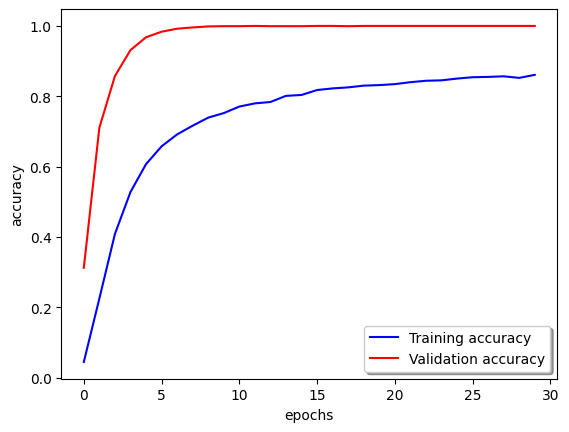

In [25]:
# Plot the classifier loss and accuracy curves for training and validation data
import matplotlib.pyplot as plt
plt.plot(historyc3.history['accuracy'], color='b', label="Training accuracy")
plt.plot(historyc3.history['val_accuracy'], color='r',label="Validation accuracy")
legend = plt.legend(loc='best', shadow=True)
plt.ylabel('accuracy')
plt.xlabel('epochs')

# Updated model test by same random mareix

In [26]:
#read the test data and seperate test data
import csv
import pandas as pd
testdataset=pd.read_csv('Dataset/DACDatatest.csv',index_col=0)
testdataset = testdataset[testdataset['Label'] < 155]
#testdataset.head()

In [27]:
import numpy as np
from sklearn.random_projection import SparseRandomProjection

column1=['RPF1','RPF2','RPF3','RPF4','RPF5','RPF6','RPF7','RPF8','RPF9','RPF10','RPF11','RPF12','RPF13','RPF14','RPF15',
         'RPF16','RPF17','RPF18','RPF19','RPF20','RPF21','RPF22','RPF23','RPF24','RPF25','RPF26','RPF27','RPF28','RPF29','RPF30',
         'RPF31','RPF32','RPF33','RPF34','RPF35','RPF36','RPF37','RPF38','RPF39','RPF40','RPF41','RPF42','RPF43','RPF44','RPF45',
         'RPF46','RPF47','RPF48','RPF49','RPF50','RPF51','RPF52','RPF53','RPF54','RPF55','RPF56','ID']
column2=column1=['RPF1','RPF2','RPF3','RPF4','RPF5','RPF6','RPF7','RPF8','RPF9','RPF10','RPF11','RPF12','RPF13','RPF14','RPF15',
         'RPF16','RPF17','RPF18','RPF19','RPF20','RPF21','RPF22','RPF23','RPF24','RPF25','RPF26','RPF27','RPF28','RPF29','RPF30',
         'RPF31','RPF32','RPF33','RPF34','RPF35','RPF36','RPF37','RPF38','RPF39','RPF40','RPF41','RPF42','RPF43','RPF44','RPF45',
         'RPF46','RPF47','RPF48','RPF49','RPF50','RPF51','RPF52','RPF53','RPF54','RPF55','RPF56']

testdatasetRP = pd.DataFrame(columns=column1)
for seed in range(0,155):
    rng = np.random.RandomState(seed+1)
    X = testdataset[testdataset['Label']==seed]
    transformer = SparseRandomProjection(n_components=56, random_state=rng)
    Xdata=X.drop(columns=['Label'])
    XRP = pd.DataFrame(transformer.fit_transform(Xdata),columns=column2)
    XRP['Label']=seed
    testdatasetRP = pd.concat([testdatasetRP, XRP], ignore_index=True)
    #print("Shape of Actual data:",Xdata.shape)
    #print("Shape of Randome Matrix:", transformer.components_.shape[1],transformer.components_.shape[0])
    #print("Shape of Projected data:", X_new.shape)
print(testdataset.shape)
print(testdatasetRP.shape)

C:\Users\mdmor\AppData\Local\Temp\ipykernel_14988\4180882096.py:21: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  testdatasetRP = pd.concat([testdatasetRP, XRP], ignore_index=True)


(4121, 66)
(4121, 57)


In [28]:
Xtest=testdatasetRP.drop(columns=['Label'])
ytest=testdatasetRP['Label']
ytest = to_categorical(ytest)

In [29]:
#Performance of the classifier
#UserModel.compile(loss='categorical_crossentropy', optimizer=Adam(),metrics=['accuracy'])
loss, accuracy = UserModel.evaluate(Xtest, ytest)
#print('Test score:', score)
print('Loss:', loss)
print('Accuracy:', accuracy)

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9996 - loss: 0.0059
Loss: 0.005549437832087278
Accuracy: 0.9995146989822388


# Updated model test by different random mareix

In [30]:
#read the test data and seperate test data
import csv
import pandas as pd
testdataset=pd.read_csv('Dataset/DACDatatest.csv',index_col=0)
testdataset = testdataset[testdataset['Label'] < 155]
#testdataset.head()

In [31]:
import numpy as np
from sklearn.random_projection import SparseRandomProjection

column1=['RPF1','RPF2','RPF3','RPF4','RPF5','RPF6','RPF7','RPF8','RPF9','RPF10','RPF11','RPF12','RPF13','RPF14','RPF15',
         'RPF16','RPF17','RPF18','RPF19','RPF20','RPF21','RPF22','RPF23','RPF24','RPF25','RPF26','RPF27','RPF28','RPF29','RPF30',
         'RPF31','RPF32','RPF33','RPF34','RPF35','RPF36','RPF37','RPF38','RPF39','RPF40','RPF41','RPF42','RPF43','RPF44','RPF45',
         'RPF46','RPF47','RPF48','RPF49','RPF50','RPF51','RPF52','RPF53','RPF54','RPF55','RPF56','ID']
column2=column1=['RPF1','RPF2','RPF3','RPF4','RPF5','RPF6','RPF7','RPF8','RPF9','RPF10','RPF11','RPF12','RPF13','RPF14','RPF15',
         'RPF16','RPF17','RPF18','RPF19','RPF20','RPF21','RPF22','RPF23','RPF24','RPF25','RPF26','RPF27','RPF28','RPF29','RPF30',
         'RPF31','RPF32','RPF33','RPF34','RPF35','RPF36','RPF37','RPF38','RPF39','RPF40','RPF41','RPF42','RPF43','RPF44','RPF45',
         'RPF46','RPF47','RPF48','RPF49','RPF50','RPF51','RPF52','RPF53','RPF54','RPF55','RPF56']

testdatasetRP = pd.DataFrame(columns=column1)
for seed in range(0,155):
    rng = np.random.RandomState(seed)
    X = testdataset[testdataset['Label']==seed]
    transformer = SparseRandomProjection(n_components=56, random_state=rng)
    Xdata=X.drop(columns=['Label'])
    XRP = pd.DataFrame(transformer.fit_transform(Xdata),columns=column2)
    XRP['Label']=seed
    testdatasetRP = pd.concat([testdatasetRP, XRP], ignore_index=True)
    #print("Shape of Actual data:",Xdata.shape)
    #print("Shape of Randome Matrix:", transformer.components_.shape[1],transformer.components_.shape[0])
    #print("Shape of Projected data:", X_new.shape)
print(testdataset.shape)
print(testdatasetRP.shape)

C:\Users\mdmor\AppData\Local\Temp\ipykernel_14988\2814101142.py:21: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  testdatasetRP = pd.concat([testdatasetRP, XRP], ignore_index=True)


(4121, 66)
(4121, 57)


In [32]:
Xtest=testdatasetRP.drop(columns=['Label'])
ytest=testdatasetRP['Label']
ytest = to_categorical(ytest)

In [33]:
#Performance of the classifier
#UserModel.compile(loss='categorical_crossentropy', optimizer=Adam(),metrics=['accuracy'])
loss, accuracy = UserModel.evaluate(Xtest, ytest)
#print('Test score:', score)
print('Loss:', loss)
print('Accuracy:', accuracy)

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0332 - loss: 11.5746
Loss: 12.056744575500488
Accuracy: 0.020383402705192566
